In [127]:
import numpy as np
import pandas as pd
from pandas import melt
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [128]:
file_path = Path("Cleaned_Data\processed_data_cleaned.csv")
spotify_df = pd.read_csv(file_path)
spotify_df.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\dkace\AppData\Local\Temp\ipykernel_4132\597727490.py:1: SyntaxWarning: invalid escape sequence '\p'
  file_path = Path("Cleaned_Data\processed_data_cleaned.csv")


,track_id,track_name,track_artist,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream_count,duration_sec,months
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,36892097.0,194.754,57
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,26063851.0,162.600,51
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,70546338.0,176.616,56
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,11862340.0,169.093,56
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,63578139.0,189.052,60


In [129]:
spotify_df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'stream_count', 'duration_sec',
       'months'],
      dtype='object')

In [130]:
genre_dummies = pd.get_dummies(spotify_df["playlist_genre"], prefix="genre")
#subgenre_dummies = pd.get_dummies(spotify_df["playlist_subgenre"], prefix="subgenre")
spotify_df = pd.concat([spotify_df, genre_dummies,], axis=1)
spotify_df.drop(columns=["playlist_genre", "playlist_subgenre"], inplace=True)

In [131]:
X = spotify_df.drop(columns=["stream_count","track_id","track_name","track_artist",
                            #'danceability',
                            #'energy',
                            'key',
                            #'loudness', 
                            'mode', 
                            #'speechiness', 
                            'acousticness', 
                            'instrumentalness',
                            'liveness',
                            'valence',
                            #'tempo',
                            'stream_count',
                            #'duration_sec',
                            #'months'
                            ],inplace=False)
y = spotify_df["stream_count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted_y_values = model.predict(X)

c:\Users\dkace\anaconda3\envs\machinelearn\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [133]:
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is -2.658929502099544e+21.
The r2 is -2.658929502099544e+21.
The mean squared error is 4.2876122918685146e+38.
The root mean squared error is 2.0706550393217397e+19.
The standard deviation is 401563603.018062.


c:\Users\dkace\anaconda3\envs\machinelearn\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<Axes: ylabel='stream_count'>

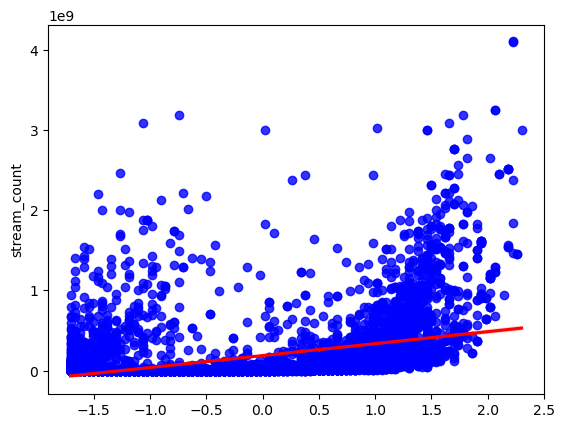

In [134]:
chosen_feature = X_test[:, 0]

sns.regplot(x=chosen_feature, y=y_test,
            scatter_kws={'color': 'blue'},
            line_kws={'color': 'red'}
           )

In [135]:
from sklearn.linear_model import ElasticNet

# Define model parameters (adjust as needed)
alpha = 0.5  # Regularization parameter (controls balance between L1 and L2 penalties)
l1_ratio = 0.5  # Mixing parameter (weight between L1 and L2 penalties)

# Create the Elastic Net model
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Fit the model on your training data
model.fit(X_train, y_train)

# Make predictions on the testing set
predicted_y_values = model.predict(X_test)

# Evaluate model performance (use similar metrics as before)
score = model.score(X_test, y_test)
r2 = r2_score(y_test, predicted_y_values)
mse = mean_squared_error(y_test, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y_test)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The score is 0.16951560921870268.
The r2 is 0.16951560921870268.
The mean squared error is 1.318450248900002e+17.
The root mean squared error is 363104702.3793553.
The standard deviation is 398442940.1953401.


<Axes: ylabel='stream_count'>

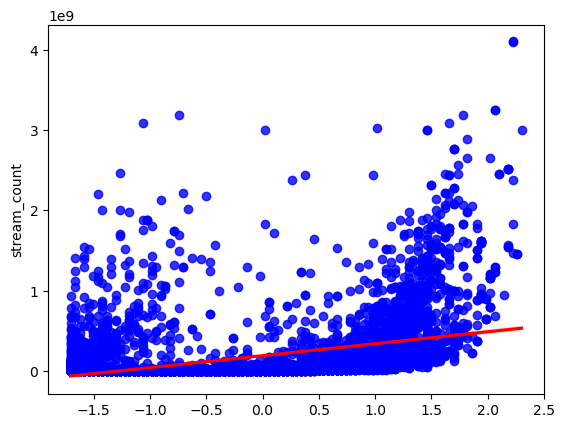

In [136]:
n_samples = min(X_test.shape[0], y_test.shape[0])
X_test_subset = X_test[:n_samples, :]
y_test_subset = y_test[:n_samples]
chosen_feature = X_test_subset[:, 0]
sns.regplot(x=chosen_feature, y=y_test_subset, color='blue', line_kws={'color': 'red'})

In [141]:
from sklearn.ensemble import RandomForestRegressor

# Experiment with hyperparameters (e.g., n_estimators, max_depth)
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=33)
model.fit(X_train, y_train)

# Make predictions on the testing set
predicted_y_values = model.predict(X_test)

# Evaluate model performance (use similar metrics as before)
score = model.score(X_test, y_test)  # Evaluate on the testing set
r2 = r2_score(y_test, predicted_y_values)
mae = mean_absolute_error(y_test, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y_test)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print("The Mean Absolute Error is ", mae)
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The score is 0.7892983372234993.
The r2 is 0.7892983372234993.
The Mean Absolute Error is  84434733.82878736
The root mean squared error is 182894277.67119443.
The standard deviation is 398442940.1953401.


<Axes: ylabel='stream_count'>

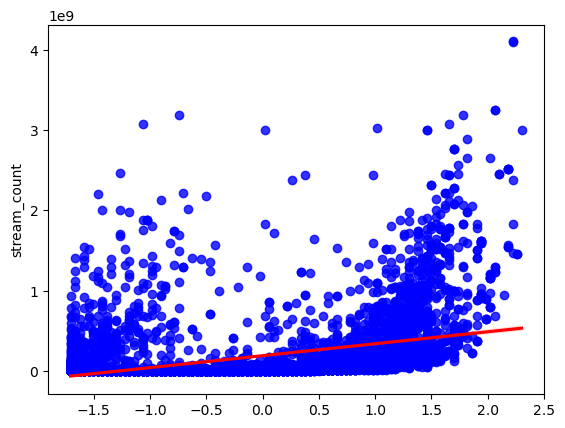

In [140]:
n_samples = min(X_test.shape[0], y_test.shape[0])
X_test_subset = X_test[:n_samples, :]
y_test_subset = y_test[:n_samples]
chosen_feature = X_test_subset[:, 0]
sns.regplot(x=chosen_feature, y=y_test_subset, color='blue', line_kws={'color': 'red'})